In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
df = df.rename(columns={'SepalLengthCm':'Sepallength', 'SepalWidthCm':'Sepalwidth', 'PetalLengthCm':'Petallength', 'PetalWidthCm':'Petalwidth'})

In [16]:
df.head()

Id  Sepallength  Sepalwidth  Petallength  Petalwidth      Species
0   1          5.1         3.5          1.4         0.2  Iris-setosa
1   2          4.9         3.0          1.4         0.2  Iris-setosa
2   3          4.7         3.2          1.3         0.2  Iris-setosa
3   4          4.6         3.1          1.5         0.2  Iris-setosa
4   5          5.0         3.6          1.4         0.2  Iris-setosa

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           150 non-null    int64  
 1   Sepallength  150 non-null    float64
 2   Sepalwidth   150 non-null    float64
 3   Petallength  150 non-null    float64
 4   Petalwidth   150 non-null    float64
 5   Species      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
df.describe()

Id  Sepallength  Sepalwidth  Petallength  Petalwidth
count  150.000000   150.000000  150.000000   150.000000  150.000000
mean    75.500000     5.843333    3.054000     3.758667    1.198667
std     43.445368     0.828066    0.433594     1.764420    0.763161
min      1.000000     4.300000    2.000000     1.000000    0.100000
25%     38.250000     5.100000    2.800000     1.600000    0.300000
50%     75.500000     5.800000    3.000000     4.350000    1.300000
75%    112.750000     6.400000    3.300000     5.100000    1.800000
max    150.000000     7.900000    4.400000     6.900000    2.500000

In [19]:
df.shape

(150, 6)

In [20]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [21]:
df.isnull().sum()

Id             0
Sepallength    0
Sepalwidth     0
Petallength    0
Petalwidth     0
Species        0
dtype: int64

## Graph visualization

<Axes: >

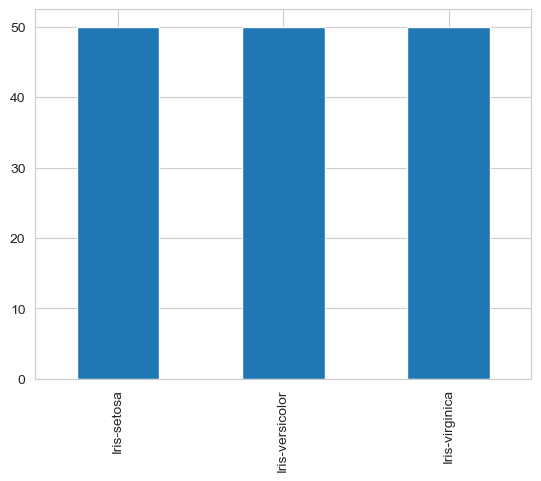

In [39]:
df['Species'].value_counts().plot(kind='bar')

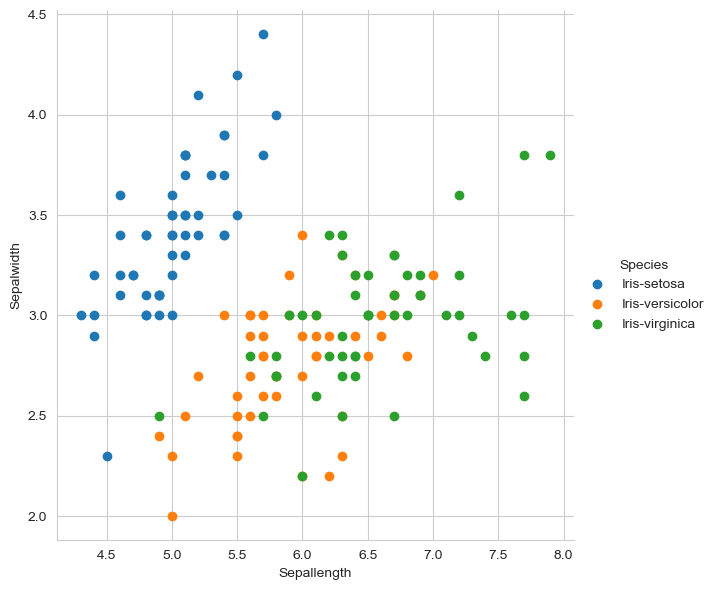

In [36]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue='Species', height=6)\
   .map(plt.scatter, 'Sepallength', 'Sepalwidth')\
   .add_legend();
plt.show()

### 3D Plot

In [47]:
import plotly.express as px
px.scatter_3d(df, x="Sepallength", y="Sepalwidth", z="Petallength", size="Petalwidth", 
              color="Species", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})

<Figure size 800x800 with 0 Axes>

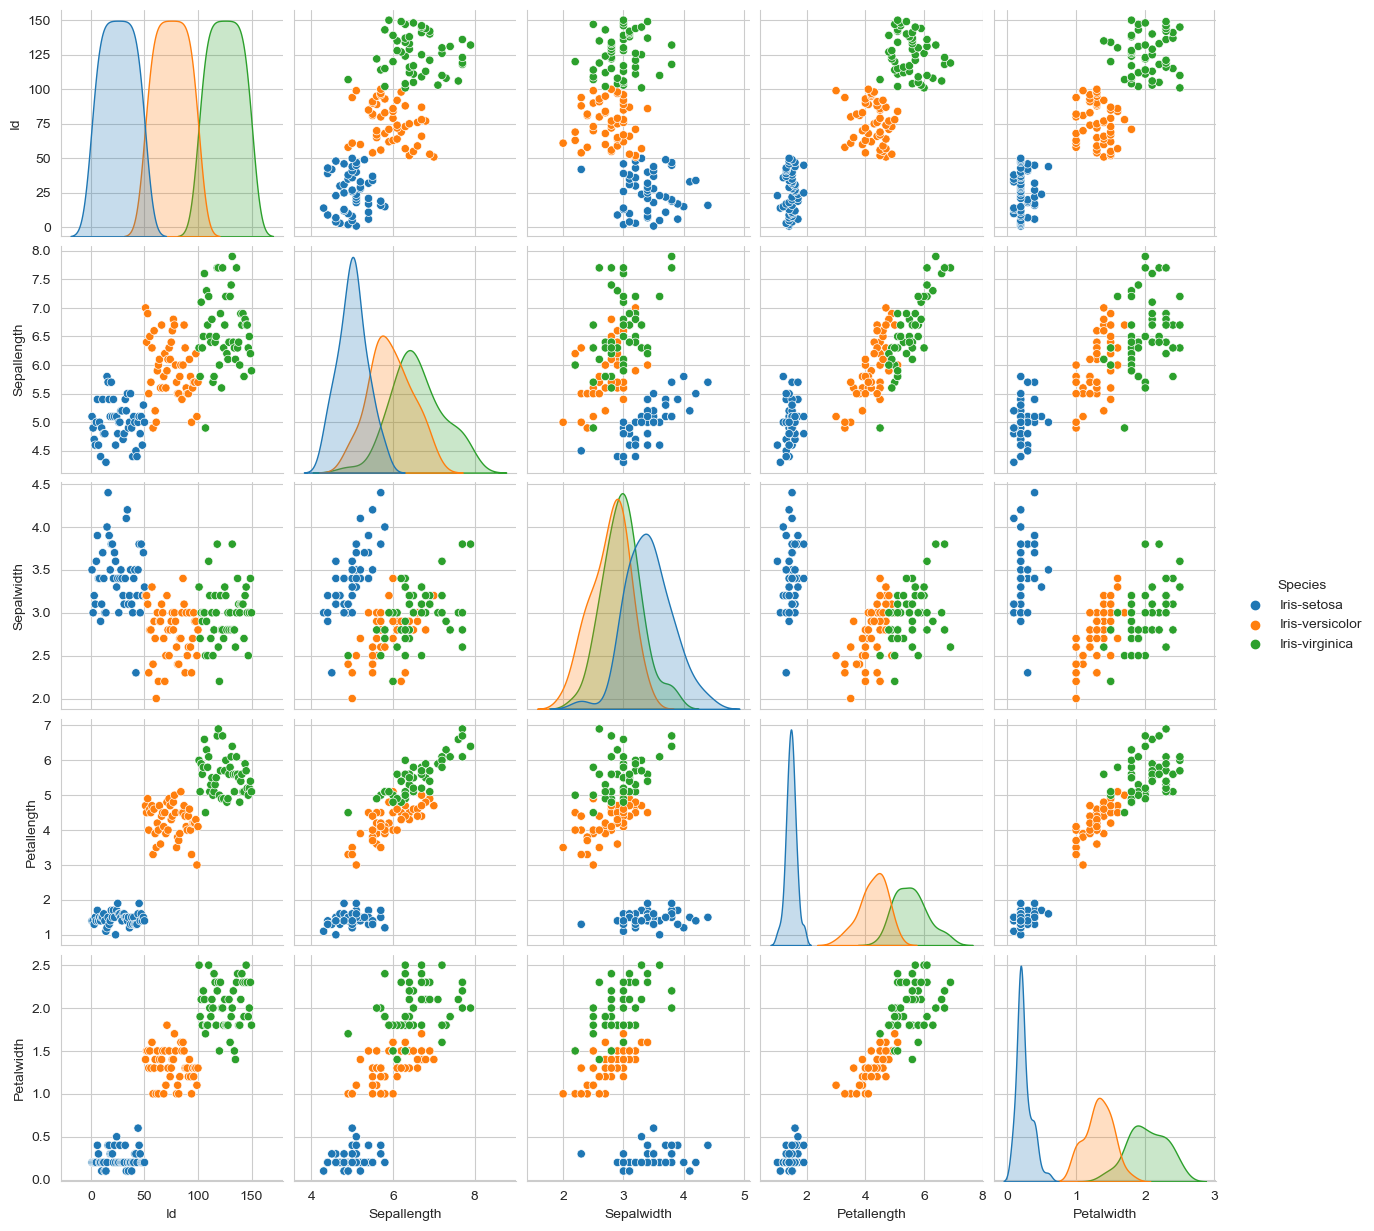

In [41]:
plt.figure(figsize=(8, 8))
ax = sns.pairplot(df, hue='Species')
plt.show()

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_22536\1944095636.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



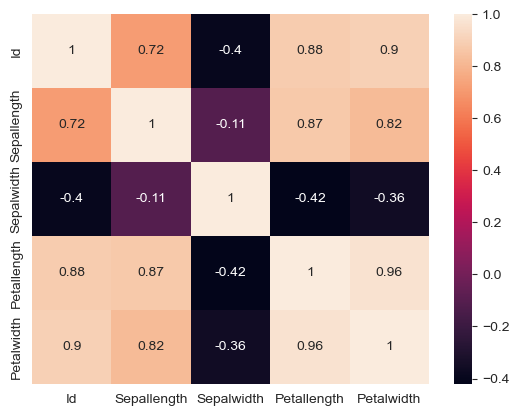

In [48]:
plt.figure() 
sns.heatmap(df.corr(),annot=True)
plt.show()

1). petal_length and petal_width are the most useful features to identify various flower types.

2). While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).

3). We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

### Distribution of the data

<Axes: xlabel='Sepallength', ylabel='Density'>

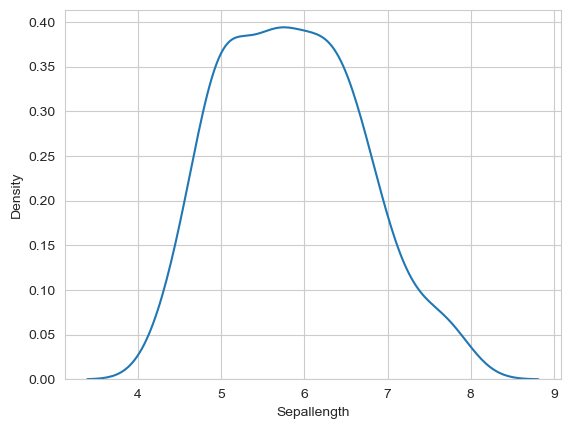

In [50]:
sns.kdeplot(df['Sepallength'])

C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserW

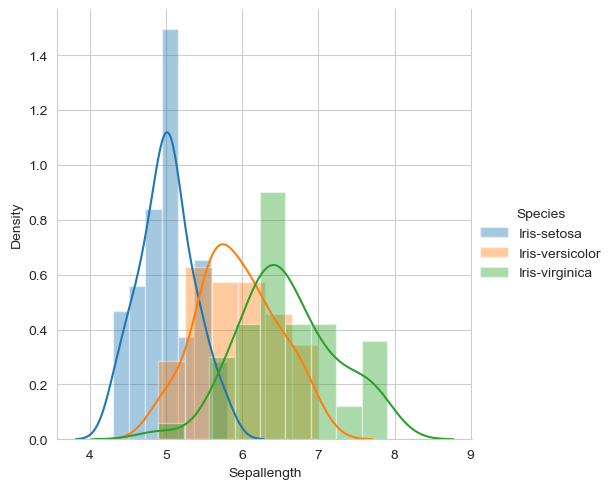

In [56]:
sns.FacetGrid(df,hue="Species", height=5)\
   .map(sns.distplot,"Sepallength")\
   .add_legend()
plt.show()

C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserW

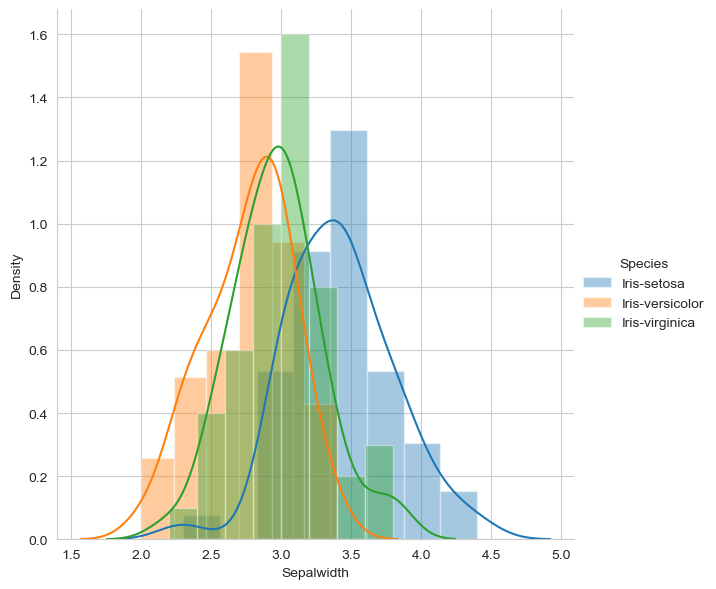

In [57]:
sns.FacetGrid(df,hue="Species", height=6)\
   .map(sns.distplot,"Sepalwidth")\
   .add_legend()
plt.show()

C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserW

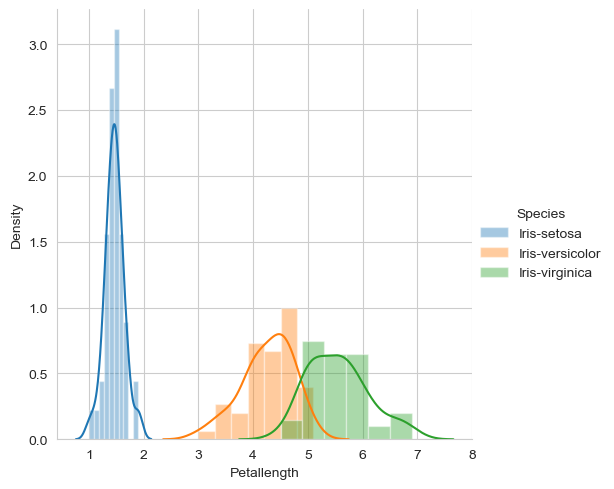

In [54]:
sns.FacetGrid(df,hue="Species",height=5)\
   .map(sns.distplot,"Petallength")\
   .add_legend();
plt.show()

C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserW

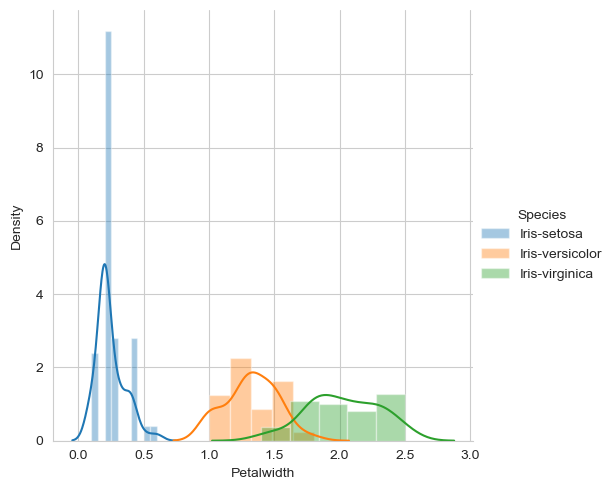

In [58]:
sns.FacetGrid(df, hue="Species", height=5)\
   .map(sns.distplot,"Petalwidth")\
   .add_legend();
plt.show()

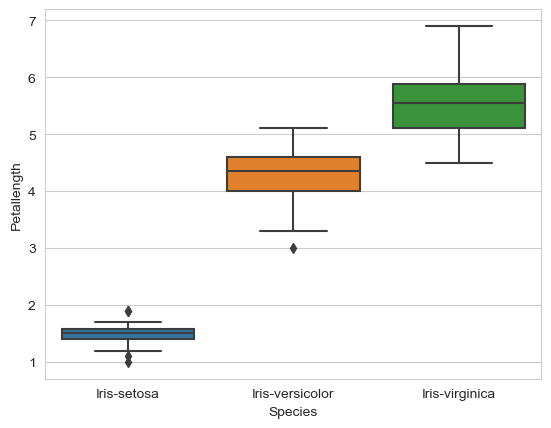

In [60]:
#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Species',y='Petallength', data=df)
plt.show()

# Kernel Density Estimation

<Axes: xlabel='Sepallength', ylabel='Density'>

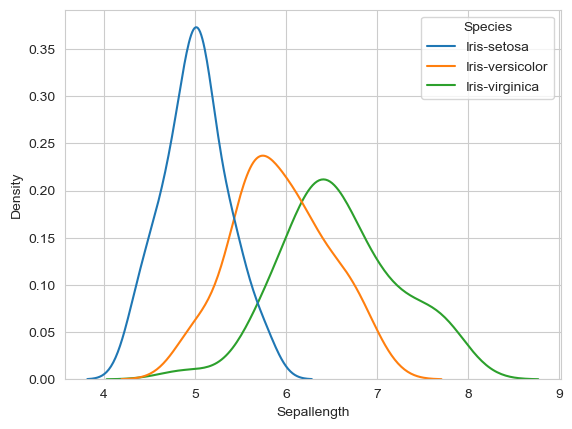

In [63]:
sns.kdeplot(data=df,x='Sepallength', hue='Species')

<Axes: xlabel='Petalwidth', ylabel='Density'>

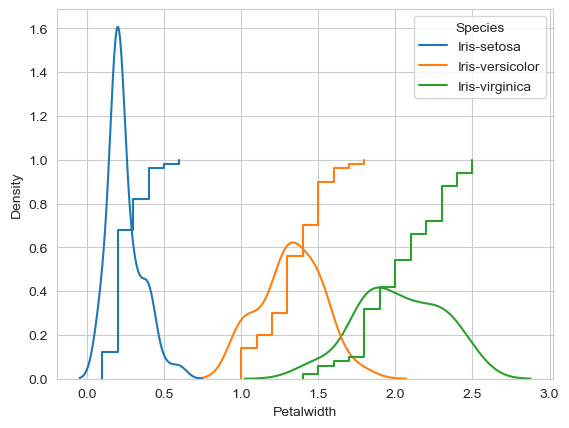

In [64]:
sns.kdeplot(data=df, x='Petalwidth', hue='Species')
sns.ecdfplot(data=df,x='Petalwidth', hue='Species')

# Apply different models to predict the flower species

### Train Test Split

In [66]:
from sklearn.model_selection import train_test_split
X = df.drop(['Species'], axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
from sklearn import svm
from sklearn.metrics import accuracy_score
svc = svm.SVC()
svc.fit(X_train,y_train)

pred = svc.predict(X_test) 
accuracy_score(pred, y_test)

1.0

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

pred = knn.predict(X_test) 
print(accuracy_score(pred, y_test))

1.0


In [70]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,y_train)

pred = nbc.predict(X_test) 
print(accuracy_score(pred, y_test))

1.0


In [71]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression()
lrc.fit(X_train,y_train)

pred = lrc.predict(X_test) 
print(accuracy_score(pred, y_test))

1.0


C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

